# More Plotting Live 2025-10-15 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
import seaborn as sns

X = sns.load_dataset("iris")

X.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


We already did plots feature by feature and/or species by species.
These were **line-graphs** (matplotlib) (a line from one instance to the next instance).

We could do
* **histograms** (pandas) (number of instances in a range of feature values)
* bargraphs (not so useful for this field)
* pie charts (not so useful for this field)
* **scatter-plot**  (matplotlib) (one point in the graph for each instance of data (2D))


<Axes: >

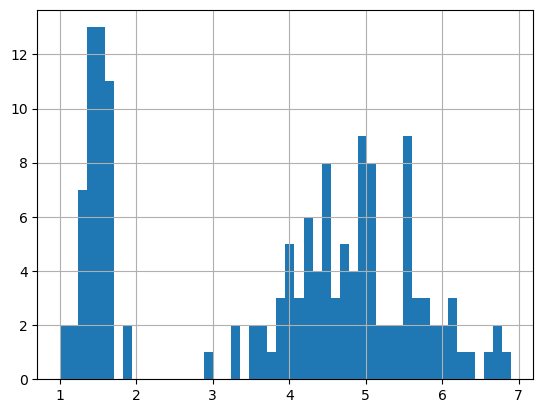

In [5]:
X.petal_length.hist(bins = 50)

X-Axis == value of the feature shown
Y-Axis == count of data instances where value is in bin (value range)

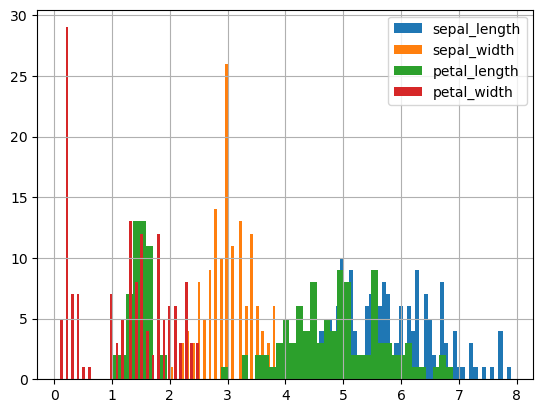

In [14]:
cols = X.columns
cols = cols.drop("species")
for c in cols:
    X[c].hist(bins = 50,label=c)
plt.legend()
plt.show()

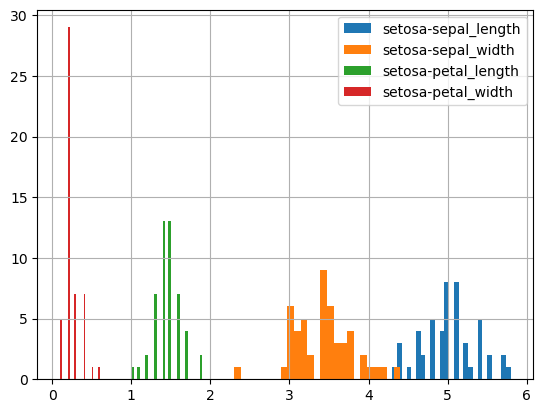

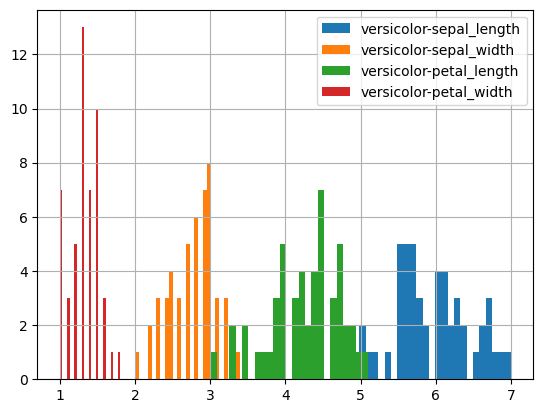

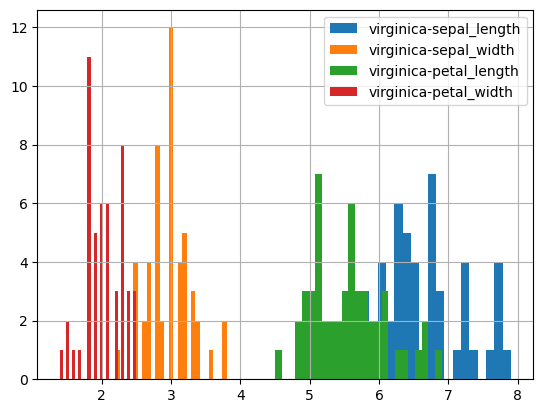

In [20]:
species = X.species.unique()
for s in species:
    xx = X[X.species == s]
    for c in cols:   
        xx[c].hist(bins = 25,label=f"{s}-{c}")
    plt.legend()    
    plt.show()


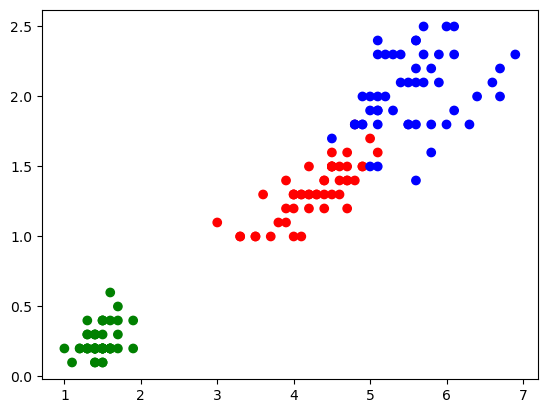

In [24]:
colors = {'setosa' : 'green', 'versicolor' : 'red',  'virginica' : 'blue'}

plt.scatter(X.petal_length,X.petal_width,c=X.species.map(colors))

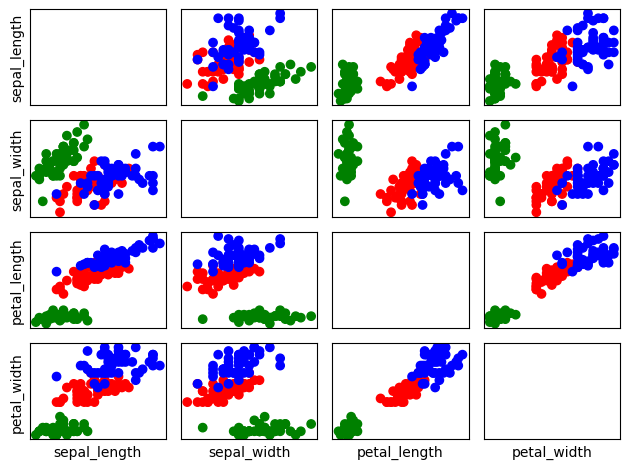

In [27]:
# from cheat sheet :-) 

columns = cols

# create subplots
fig, axes = plt.subplots(nrows=len(columns), ncols=len(columns))

# two nested loops to plot each feature against each feature
for ix, xf in enumerate(columns):
    for iy, yf in enumerate(columns):
        x = X[xf]
        y = X[yf]
        if ix != iy:
            axes[iy, ix].scatter(x,y,c=X['species'].map(colors))
        if iy == len(columns)-1:
            axes[iy, ix].set_xlabel(xf)
        if ix == 0:
            axes[iy, ix].set_ylabel(yf)
        axes[iy, ix].set_xticks([])
        axes[iy, ix].set_yticks([])
plt.tight_layout()
plt.show()